# Import TF and others

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

# Read fire_theft file and process

In [43]:
# X = fires per 1000 housing units
# Y = thefts per 1000 population
# Downloaded from
# http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr05.xls
DATA_FILE = "slr05.xls"
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])

# Count excluding header

In [44]:
n_samples = sheet.nrows - 1
print(n_samples)

42


# Peek the data

(42,) (42,)


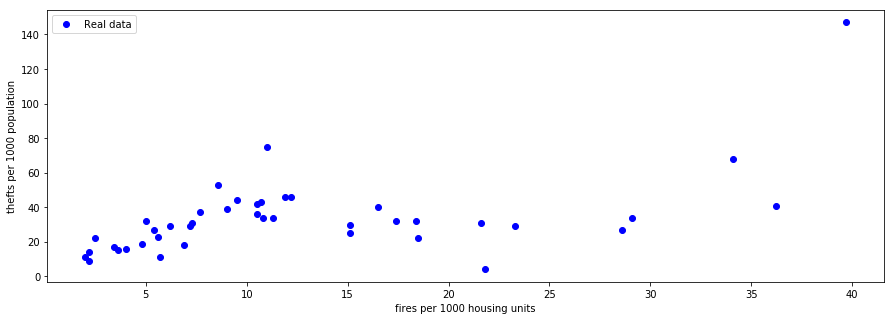

In [53]:
x, y = data.T[0], data.T[1]
print (x.shape,y.shape)
plt.figure(figsize=(15,5))
plt.plot(x, y, 'bo', label='Real data')
plt.legend()
plt.xlabel('fires per 1000 housing units')
plt.ylabel('thefts per 1000 population')
plt.show()

# create input X (number of fire) and label Y (number of theft)

In [46]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# Think about linear relation: Theft_predict = w * Fire + bias

In [47]:
w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")
Y_predicted = X * w + b

# Define the critical loss function!!

In [48]:
# absolute error
# loss = tf.abs(Y - Y_predicted, name="loss")
# squared error
loss = tf.square(Y - Y_predicted, name="loss")

# Optimize? Start with gradient descent

In [49]:
# Try play with different learning rate
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.0001).minimize(loss)

# Now let's train it!

In [52]:


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(
        './linear_regression_001', sess.graph)
    for i in range(1000): # try different number of epochs
        total_loss = 0
        for x, y in data:
            # Session runs train_op to minimize loss
            _, current_loss = sess.run(
                [optimizer, loss], feed_dict={X: x, Y:y})
            total_loss += current_loss
        if (i > 0 and i % 20 == 0):
            print(('Epoch {0}: {1}'.format(i, total_loss / n_samples)))
    print('Training completed.')
    w_value, b_value = sess.run([w, b])
    print('After Training:\ntheft_predict = %s * fire + %s' % (w_value, b_value))
    writer.close()

Epoch 20: 514.658701695147
Epoch 40: 504.50930420983406
Epoch 60: 495.5496041961901
Epoch 80: 487.64112064810024
Epoch 100: 480.6615467593074
Epoch 120: 474.50262902818974
Epoch 140: 469.0687214760553
Epoch 160: 464.2753134880747
Epoch 180: 460.0476824800883
Epoch 200: 456.31975202235793
Epoch 220: 453.0331176491011
Epoch 240: 450.13627911829167
Epoch 260: 447.58341902498864
Epoch 280: 445.3344934163172
Epoch 300: 443.35363257676363
Epoch 320: 441.6095315140757
Epoch 340: 440.07426081899376
Epoch 360: 438.7233776929123
Epoch 380: 437.5351394187296
Epoch 400: 436.4903442621248
Epoch 420: 435.5721469965009
Epoch 440: 434.7653860210336
Epoch 460: 434.0570709460548
Epoch 480: 433.43536324266876
Epoch 500: 432.8900374582126
Epoch 520: 432.4120455238236
Epoch 540: 431.9933244086625
Epoch 560: 431.6267284388166
Epoch 580: 431.3060586431197
Epoch 600: 431.02585315668864
Epoch 620: 430.78114311680906
Epoch 640: 430.56765126614346
Epoch 660: 430.3816897017615
Epoch 680: 430.21979357373147
Epoch 

# Visualize the prediction!

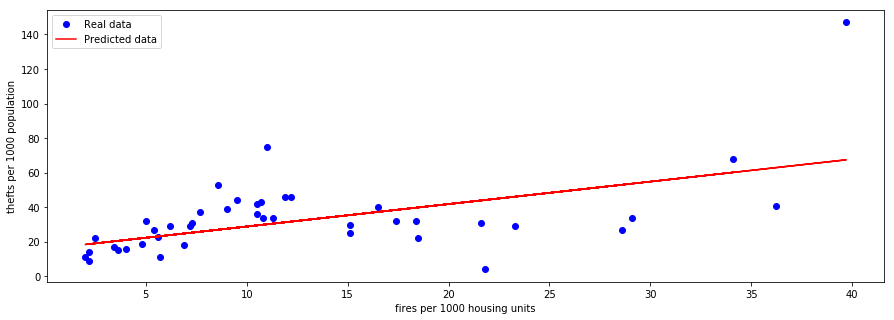

In [10]:
x, y = data.T[0], data.T[1]
plt.figure(figsize=(15,5))
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, x * w_value + b_value, 'r', label='Predicted data')
plt.xlabel('fires per 1000 housing units')
plt.ylabel('thefts per 1000 population')
plt.legend()
plt.show()